## This notebook for solve task about decrease dimensional

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.decomposition import PCA

with open('eigen.pkl', 'br') as file:
    X = pickle.load(file)

<function matplotlib.pyplot.show(close=None, block=None)>

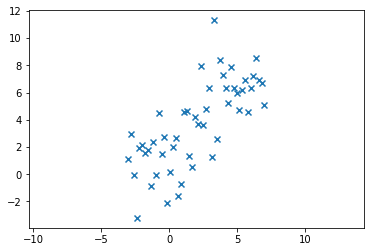

In [2]:
plt.scatter(X[:,0], X[:,1], marker='x')
plt.axis('equal')
plt.show

In [3]:
pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

In [4]:
X[:10]

array([[-3.        ,  1.1474225 ],
       [-2.79591837,  2.91847142],
       [-2.59183673, -0.05209246],
       [-2.3877551 , -3.2127219 ],
       [-2.18367347,  1.91180977],
       [-1.97959184,  2.14358145],
       [-1.7755102 ,  1.53225988],
       [-1.57142857,  1.75427292],
       [-1.36734694, -0.86299657],
       [-1.16326531,  2.33830441]])

In [5]:
X_new = pca.inverse_transform(X_pca)

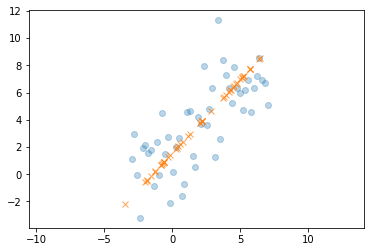

In [6]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'x', alpha=0.7)
plt.axis('equal')
plt.show()

## homework for module 8 with the help of algorithm of PCA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

In [8]:
data = pd.read_csv('client_segmentation.csv')
X = data.iloc[:, 0:3]
y = data['customes_class']

In [9]:
print(data.shape)
print(data.dtypes)

(100, 4)
call_diff         float64
sms_diff          float64
traffic_diff      float64
customes_class    float64
dtype: object


In [10]:
data.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


### 
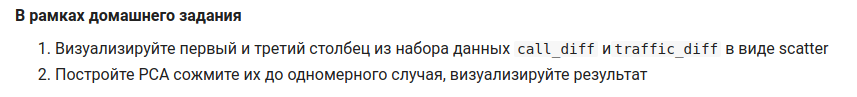

In [11]:
# build model of PCA
x_two_features = X.loc[:, ['call_diff', 'traffic_diff']]
pca = (PCA(n_components=1)
       .fit(x_two_features))
X_pca = pca.transform(x_two_features)
X_new = pca.inverse_transform(X_pca)

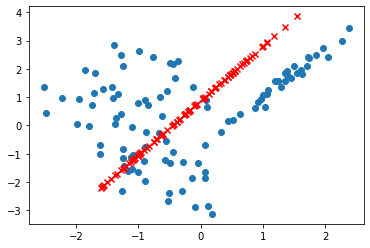

In [12]:
# points before PCA
plt.scatter(X.loc[:, 'call_diff'],
            X.loc[:, 'traffic_diff'])
# points after PCA
plt.scatter(X_new[:, 0],
            X_new[:, 1], marker='x', color='r')
plt.show()

### 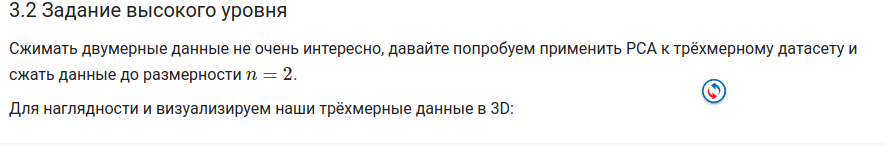

In [13]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)

In [14]:
y[:] == 0

0      True
1     False
2      True
3     False
4     False
      ...  
95    False
96    False
97     True
98    False
99     True
Name: customes_class, Length: 100, dtype: bool

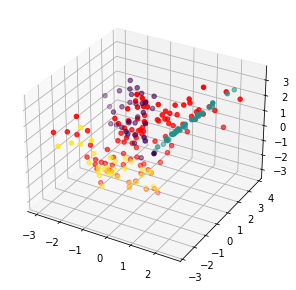

In [15]:
# visualization with 3 dimensional
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0],
           X.iloc[:, 1],
           X.iloc[:, 2],
           c=y)

ax.scatter(X_new[:, 0],
           X_new[:, 1],
           X_new[:, 2],
           color='r')
plt.show()

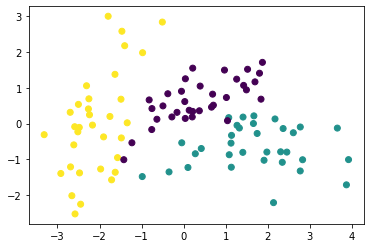

In [16]:
# visualization with 2 dimensional
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

In [22]:
from sklearn.decomposition import TruncatedSVD

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
with open('eigen.pkl', 'br') as file:
    X = pickle.load(file)

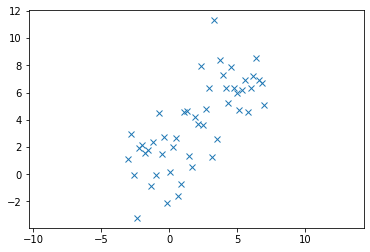

In [27]:
plt.plot(X[:, 0], X[:, 1], 'x')
plt.axis('equal')
plt.show()

In [30]:
# apply SVD
svd_model = TruncatedSVD(n_components=1).fit(X)
X_svd = svd_model.transform(X)
X_svd_restored = svd_model.inverse_transform(X_svd)

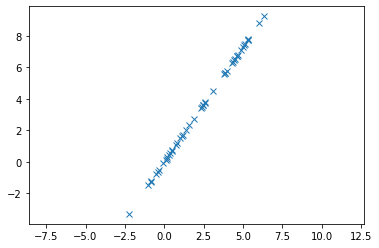

In [34]:
plt.plot(X_svd_restored[:, 0],
         X_svd_restored[:, 1], 'x')
plt.axis('equal')
plt.show()